In [293]:
import pandas as pd
import sqlite3
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns



In [294]:
# Connect to the database
conn = sqlite3.connect('zomato.db')

# Customers Analysis

In [295]:
# Query data from the database
query = "SELECT * FROM Customers"
df_customers = pd.read_sql(query, conn)

print(df_customers.shape)
df_customers.head()

(15000, 7)


,customer_id,first_name,last_name,city,state,country,registration_timestamp
0,1,Mira,Nath,Rajkot,Gujarat,India,2023-01-15 18:23:28
1,2,Avni,Malhotra,Faridabad,Haryana,India,2023-01-10 00:33:35
2,3,Aarav,Bose,Faridabad,Haryana,India,2023-01-14 11:57:08
3,4,Arjun,Pillai,Kanpur,Uttar Pradesh,India,2023-01-01 20:09:53
4,5,Aditi,Chatterjee,Vadodara,Gujarat,India,2023-01-19 20:17:22


In [296]:
# checking data types
df_customers.dtypes

customer_id                int64
first_name                object
last_name                 object
city                      object
state                     object
country                   object
registration_timestamp    object
dtype: object

In [297]:
# checking null values in columns
df_customers.isna().sum()

customer_id               0
first_name                0
last_name                 0
city                      0
state                     0
country                   0
registration_timestamp    0
dtype: int64

In [298]:
# correcting datatype of registration_timestamp to timestamp 
df_customers['registration_timestamp'] = pd.to_datetime(df_customers['registration_timestamp'])

# checkng datatypes again 
df_customers.dtypes

customer_id                        int64
first_name                        object
last_name                         object
city                              object
state                             object
country                           object
registration_timestamp    datetime64[ns]
dtype: object

In [299]:
# checking duplicated at customer_id level
print(df_customers['customer_id'].nunique())

15000


In [300]:
# checking range of registration_timestamp
df_customers['registration_timestamp'].min(), df_customers['registration_timestamp'].max()

(Timestamp('2023-01-01 00:20:22'), Timestamp('2023-12-31 23:39:27'))

#### Monthly Customer Registrations Trend

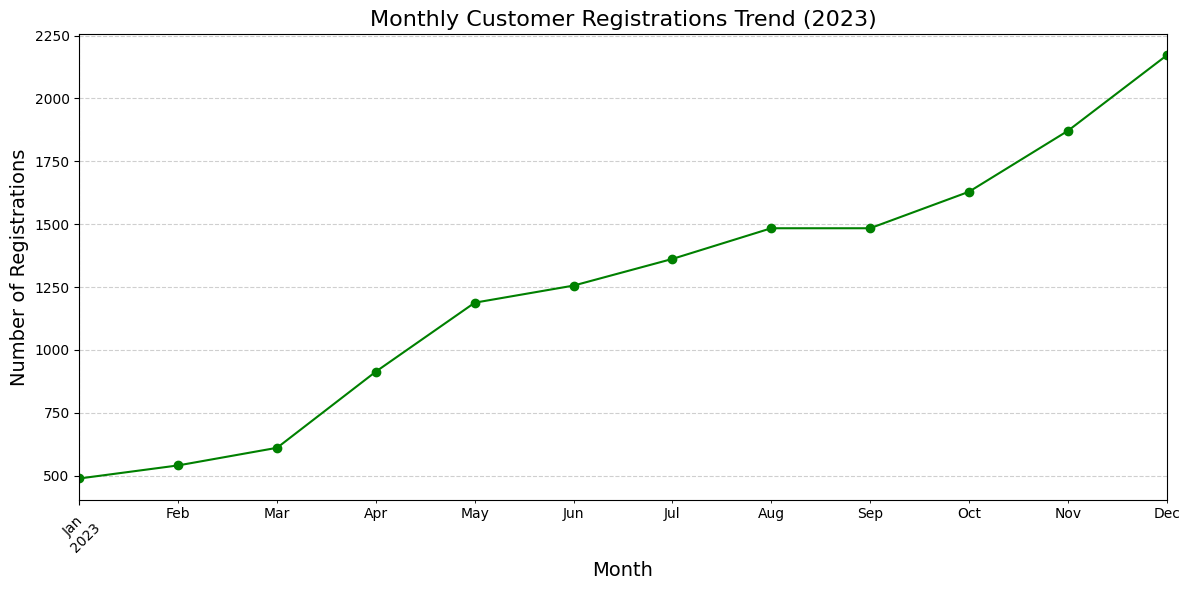

In [301]:
df_customers['registration_month'] = df_customers['registration_timestamp'].dt.to_period('M')

monthly_registrations = df_customers.groupby('registration_month').size()

# Plotting the trend
plt.figure(figsize=(12, 6))
monthly_registrations.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Monthly Customer Registrations Trend (2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Registrations', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### State-Level Distribution Of Customers (Last 6 Months)

In [302]:
# Set the start_date and end_date last 6 months
start_date = datetime(2023, 7, 1).date()
end_date = datetime(2023, 12, 31).date()

print(start_date, end_date)


2023-07-01 2023-12-31


In [303]:
df_customers['registration_date'] = pd.to_datetime(df_customers['registration_timestamp']).dt.date 
df_customers.head()

,customer_id,first_name,last_name,city,state,country,registration_timestamp,registration_month,registration_date
0,1,Mira,Nath,Rajkot,Gujarat,India,2023-01-15 18:23:28,2023-01,2023-01-15
1,2,Avni,Malhotra,Faridabad,Haryana,India,2023-01-10 00:33:35,2023-01,2023-01-10
2,3,Aarav,Bose,Faridabad,Haryana,India,2023-01-14 11:57:08,2023-01,2023-01-14
3,4,Arjun,Pillai,Kanpur,Uttar Pradesh,India,2023-01-01 20:09:53,2023-01,2023-01-01
4,5,Aditi,Chatterjee,Vadodara,Gujarat,India,2023-01-19 20:17:22,2023-01,2023-01-19


C:\Users\ravik\AppData\Local\Temp\ipykernel_74768\1388784947.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


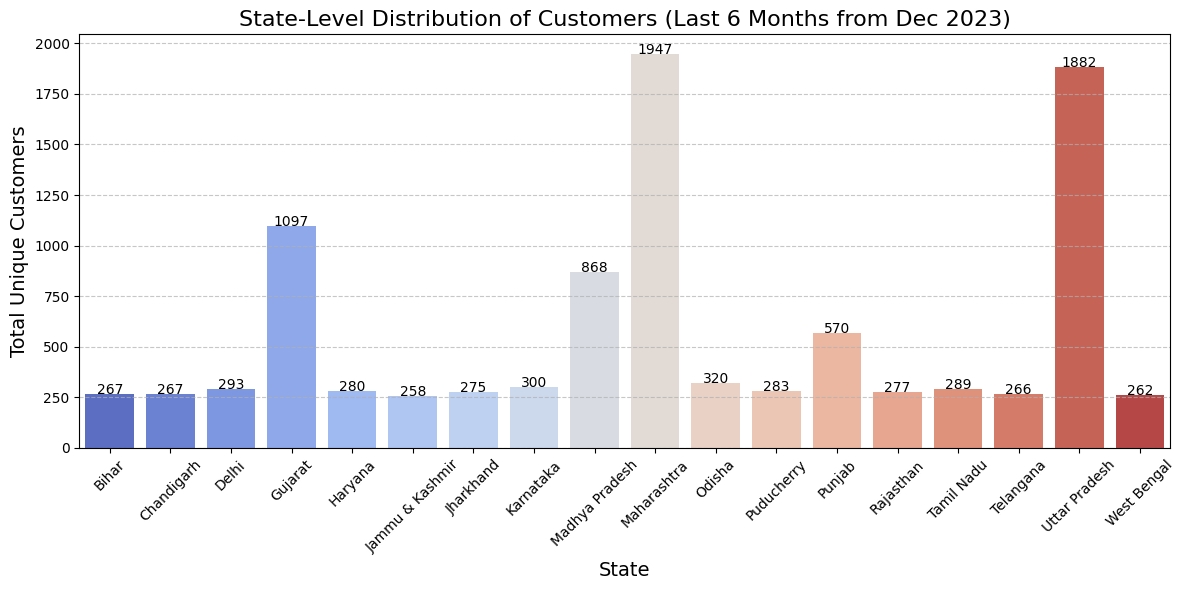

In [304]:
# Filter the dataframe for customers registered in the last 6 months from December 2023
df_last_six_months_customers = df_customers[
    (df_customers['registration_date'] >= start_date) &
    (df_customers['registration_date'] <= end_date)
]

# Group by state and count the number of customers
state_distribution = df_last_six_months_customers.groupby(['state']).agg(total_customers = ('customer_id', 'nunique')).reset_index()

# Set up the figure and plot 
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=state_distribution,
    x='state',
    y='total_customers',
    palette='coolwarm'
)

# Add labels over each bar
for index, row in state_distribution.iterrows():
    bar_plot.text(
        index, 
        row['total_customers'] + 0.5,  # Position slightly above the bar
        f"{row['total_customers']}", 
        color='black', 
        ha="center"
    )

# Enhance the visualization
plt.title('State-Level Distribution of Customers (Last 6 Months from Dec 2023)', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Unique Customers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [54]:
query = '''
select * 
from Orders 
where DATE(Order_timestamp) between '2023-01-01' and '2023-12-31'
'''

df_orders = pd.read_sql(query, conn)
print(df_orders.shape)
df_orders.head()

(50108, 4)


,OrderID,CustomerID,RestaurantID,Order_timestamp
0,1,11295,863,2023-11-19 15:25:54
1,2,4200,999,2023-08-24 14:48:23
2,3,4200,388,2023-10-13 18:51:26
3,4,4200,37,2023-09-07 22:39:28
4,5,7664,814,2023-11-22 22:48:53


In [55]:
print(df_orders.dtypes)

OrderID             int64
CustomerID          int64
RestaurantID        int64
Order_timestamp    object
dtype: object


In [56]:
print(df_orders.isna().sum())

OrderID            0
CustomerID         0
RestaurantID       0
Order_timestamp    0
dtype: int64


In [57]:
df_orders['Order_timestamp'] = pd.to_datetime(df_orders['Order_timestamp'])

df_orders['order_month'] = df_orders['Order_timestamp'].dt.to_period('M')

print(df_orders.dtypes)
df_orders.head()


OrderID                     int64
CustomerID                  int64
RestaurantID                int64
Order_timestamp    datetime64[ns]
order_month             period[M]
dtype: object


,OrderID,CustomerID,RestaurantID,Order_timestamp,order_month
0,1,11295,863,2023-11-19 15:25:54,2023-11
1,2,4200,999,2023-08-24 14:48:23,2023-08
2,3,4200,388,2023-10-13 18:51:26,2023-10
3,4,4200,37,2023-09-07 22:39:28,2023-09
4,5,7664,814,2023-11-22 22:48:53,2023-11


C:\Users\ravik\AppData\Local\Temp\ipykernel_74768\1261641903.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_orders_grp, x='order_month', y='total_customers', palette='viridis')


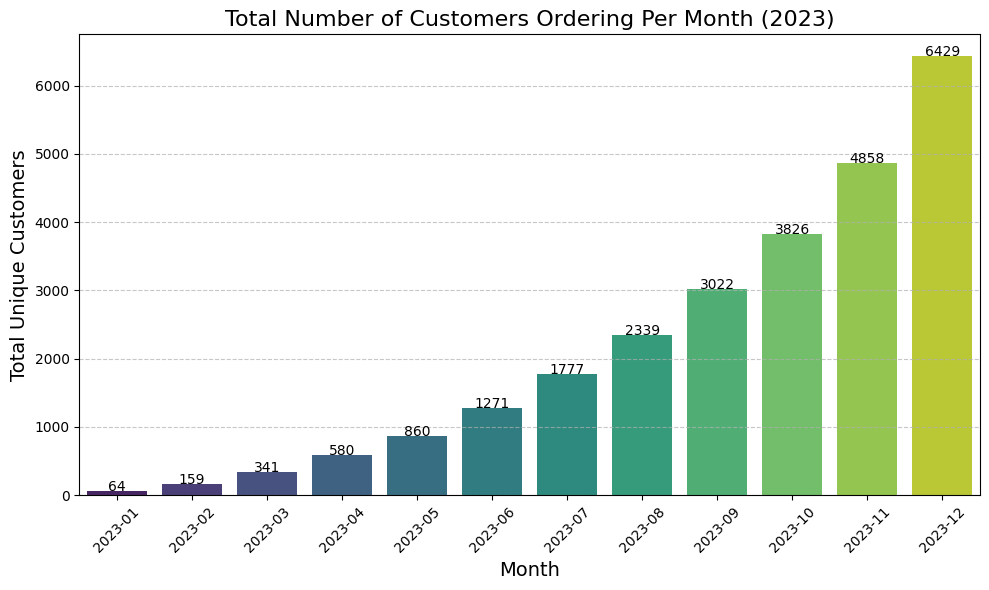

In [58]:
df_orders_grp = df_orders.groupby(['order_month']).agg(total_customers = ('CustomerID', 'nunique')).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_orders_grp, x='order_month', y='total_customers', palette='viridis')

# Adding labels on top of bars
for index, row in df_orders_grp.iterrows():
    plt.text(index, row['total_customers'] + 0.1, f"{row['total_customers']}", ha='center')

# Customizing the plot
plt.title('Total Number of Customers Ordering Per Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Unique Customers', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Restaurant Analysis

In [331]:
# reading restaurants data
query = '''

select * 
from Restaurants 
'''

df_restaurants = pd.read_sql(query, conn)
print(df_restaurants.shape)
df_restaurants.head()

(1000, 9)


,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time,contact
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00,+91 8906212789
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00,+91 9227775822
2,3,Mint and Basil,American,Ludhiana,Punjab,India,07:00:00,22:00:00,+91 9767659722
3,4,Ganges Grill,Fusion,Kolkata,West Bengal,India,07:00:00,22:00:00,+91 9999547258
4,5,Viva Goa,Indian,Nagpur,Maharashtra,India,00:00:00,23:59:00,+91 9264179394


In [332]:
# checking datatypes
df_restaurants.dtypes

RestaurantID     int64
Name            object
CuisineType     object
city            object
state           object
country         object
opening_time    object
closing_time    object
contact         object
dtype: object

In [333]:
# checking null values
df_restaurants.isna().sum()

RestaurantID     0
Name            11
CuisineType     11
city            11
state            0
country          0
opening_time     0
closing_time     0
contact         10
dtype: int64

##### First we will fill null values in city column then we will fill CuisineType

In [334]:
# we will find most common/frequent restaurant in each state to fill null values in city column
df_restaurants_state_city = df_restaurants.groupby(['state', 'city']).agg(total_restaurants = ('RestaurantID', 'nunique')).reset_index()

# Assigning rank to each city in state according to total number of restaurant
df_restaurants_state_city['rank'] = df_restaurants_state_city.groupby(['state'])['total_restaurants'].rank(method='first', ascending=False)

# Sorting dataframe - making it easier to verify rank values
df_restaurants_state_city.sort_values(by = ['state', 'total_restaurants'], ascending=False, inplace=True)

print(df_restaurants_state_city.shape)
df_restaurants_state_city.head()

(36, 4)


,state,city,total_restaurants,rank
35,West Bengal,Kolkata,34,1.0
30,Uttar Pradesh,Ghaziabad,33,1.0
32,Uttar Pradesh,Lucknow,33,2.0
28,Uttar Pradesh,Agra,32,3.0
29,Uttar Pradesh,Allahabad,25,4.0


In [335]:
# filtering most common city in each state
df_restaurants_state_most_frequent_city = df_restaurants_state_city[df_restaurants_state_city['rank']==1][['state', 'city']].copy()
df_restaurants_state_most_frequent_city.rename(columns = {'city':'most_frequent_city'}, inplace = True)
df_restaurants_state_most_frequent_city.head(2)

,state,most_frequent_city
35,West Bengal,Kolkata
30,Uttar Pradesh,Ghaziabad


In [336]:
# finding most common/frequent CuisineType in each city
df_restaurants_city_cuisine_type = df_restaurants.groupby(['city', 'CuisineType']).agg(total_restaurants = ('RestaurantID', 'nunique')).reset_index()

# Assigning rank to each CuisineType in city according to total number of restaurant
df_restaurants_city_cuisine_type['rank'] = df_restaurants_city_cuisine_type.groupby(['city'])['total_restaurants'].rank(method='first', ascending=False)

# Sorting dataframe - making it easier to verify rank values
df_restaurants_city_cuisine_type.sort_values(by = ['city', 'total_restaurants'], ascending=False, inplace=True)

print(df_restaurants_city_cuisine_type.shape)
df_restaurants_city_cuisine_type.head()

(492, 4)


,city,CuisineType,total_restaurants,rank
487,Vasai,Mediterranean,3,1.0
489,Vasai,Spanish,3,2.0
490,Vasai,Thai,3,3.0
491,Vasai,Vietnamese,3,4.0
481,Vasai,Fusion,2,5.0


In [337]:
# filtering most common city in each state
df_restaurants_city_most_frequent_cuisine_type = df_restaurants_city_cuisine_type[df_restaurants_city_cuisine_type['rank']==1][['city', 'CuisineType']].copy()
df_restaurants_city_most_frequent_cuisine_type.rename(columns = {'CuisineType':'most_frequent_CuisineType'}, inplace = True)

df_restaurants_city_most_frequent_cuisine_type.head(2)

,city,most_frequent_CuisineType
487,Vasai,Mediterranean
471,Varanasi,Greek


In [338]:
# Now fillling null values with best appoximations 

# filling null city 
df_restaurants = df_restaurants.merge(df_restaurants_state_most_frequent_city, on = ['state'], how = 'left')
df_restaurants.loc[df_restaurants['city'].isna(), 'city'] = df_restaurants['most_frequent_city']

print(df_restaurants.shape)
print(df_restaurants.isna().sum())
df_restaurants.head(2)

(1000, 10)
RestaurantID           0
Name                  11
CuisineType           11
city                   0
state                  0
country                0
opening_time           0
closing_time           0
contact               10
most_frequent_city     0
dtype: int64


,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time,contact,most_frequent_city
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00,+91 8906212789,Ghaziabad
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00,+91 9227775822,Rajkot


In [339]:
# filling null cuisine type 
df_restaurants = df_restaurants.merge(df_restaurants_city_most_frequent_cuisine_type, on = ['city'], how = 'left')
df_restaurants.loc[df_restaurants['CuisineType'].isna(), 'CuisineType'] = df_restaurants['most_frequent_CuisineType']

print(df_restaurants.shape)
print(df_restaurants.isna().sum())
df_restaurants.head(2)

(1000, 11)
RestaurantID                  0
Name                         11
CuisineType                   0
city                          0
state                         0
country                       0
opening_time                  0
closing_time                  0
contact                      10
most_frequent_city            0
most_frequent_CuisineType     0
dtype: int64


,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time,contact,most_frequent_city,most_frequent_CuisineType
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00,+91 8906212789,Ghaziabad,Chinese
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00,+91 9227775822,Rajkot,Middle Eastern


In [340]:
# filling null restaurant name 
# Filling missing restaurant names with unique placeholders like 'Unknown Restaurant 1', 'Unknown Restaurant 2', etc.

df_restaurants_name_null = df_restaurants[df_restaurants['Name'].isna()][['RestaurantID', 'Name']].copy()

print(df_restaurants_name_null.shape)
df_restaurants_name_null.head()


(11, 2)


,RestaurantID,Name
56,57,None
76,77,None
104,105,None
226,227,None
269,270,None


In [341]:
name_list = ["Unknown Restaurant " + str(i) for i in range(1, df_restaurants_name_null.shape[0] + 1)]
print(name_list)

['Unknown Restaurant 1', 'Unknown Restaurant 2', 'Unknown Restaurant 3', 'Unknown Restaurant 4', 'Unknown Restaurant 5', 'Unknown Restaurant 6', 'Unknown Restaurant 7', 'Unknown Restaurant 8', 'Unknown Restaurant 9', 'Unknown Restaurant 10', 'Unknown Restaurant 11']


In [342]:
df_restaurants_name_null['Imputed_Name'] = name_list
print(df_restaurants_name_null.shape)
df_restaurants_name_null.head()

(11, 3)


,RestaurantID,Name,Imputed_Name
56,57,None,Unknown Restaurant 1
76,77,None,Unknown Restaurant 2
104,105,None,Unknown Restaurant 3
226,227,None,Unknown Restaurant 4
269,270,None,Unknown Restaurant 5


In [343]:
df_restaurants = df_restaurants.merge(df_restaurants_name_null[['RestaurantID', 'Imputed_Name']], on = ['RestaurantID'], how = 'left')

df_restaurants.loc[df_restaurants['Name'].isna(), 'Name'] = df_restaurants['Imputed_Name']

print(df_restaurants.shape)
print(df_restaurants.isna().sum())
df_restaurants.head(2)

(1000, 12)
RestaurantID                   0
Name                           0
CuisineType                    0
city                           0
state                          0
country                        0
opening_time                   0
closing_time                   0
contact                       10
most_frequent_city             0
most_frequent_CuisineType      0
Imputed_Name                 989
dtype: int64


,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time,contact,most_frequent_city,most_frequent_CuisineType,Imputed_Name
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00,+91 8906212789,Ghaziabad,Chinese,NaN
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00,+91 9227775822,Rajkot,Middle Eastern,NaN


In [345]:
# deliting columns which are not useful anymore
df_restaurants.drop(columns = ['contact', 'most_frequent_city', 'most_frequent_CuisineType', 'Imputed_Name'], inplace = True)
df_restaurants.head(2)

,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00


In [346]:
# checking duplicates
df_restaurants['RestaurantID'].nunique()

1000

#### State-Level Percentage Of Restaurants

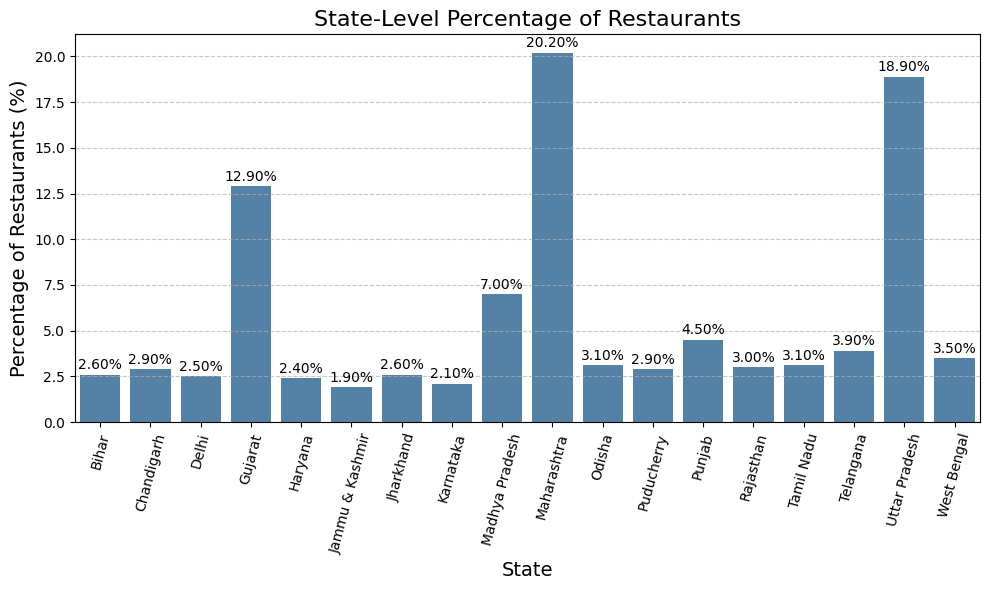

In [347]:
# Calculate total restaurants per state
state_totals = df_restaurants.groupby('state').agg(total_restaurants = ('RestaurantID', 'nunique')).reset_index()

# Calculate percentage of total restaurants for each state
state_totals['percentage'] = (state_totals['total_restaurants'] / state_totals['total_restaurants'].sum()) * 100

# Plotting the percentage of restaurants per state using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=state_totals, x='state', y='percentage', color='steelblue')

# Adding labels to each bar
for index, row in state_totals.iterrows():
    plt.text(index, row['percentage'] + 0.3, f"{row['percentage']:.2f}%", ha='center')

# Enhancing the plot
plt.title('State-Level Percentage of Restaurants', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Percentage of Restaurants (%)', fontsize=14)
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Percentage Distribution Over Cuisine Type

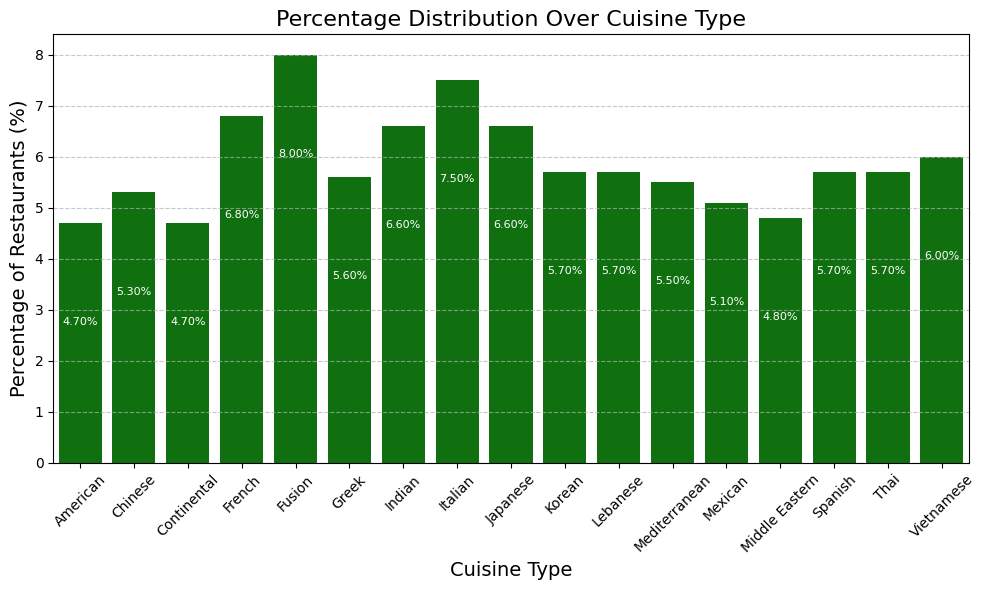

In [348]:
# Calculate total restaurants per cuisine type
cuisine_totals = df_restaurants.groupby('CuisineType').agg(total_restaurants = ('RestaurantID', 'nunique')).reset_index()

# Calculate percentage of total restaurants for each cuisine type
cuisine_totals['percentage'] = (cuisine_totals['total_restaurants'] / cuisine_totals['total_restaurants'].sum()) * 100

# Plotting the percentage distribution over cuisine type
plt.figure(figsize=(10, 6))
sns.barplot(data=cuisine_totals, x='CuisineType', y='percentage', color='green')

# Adding labels slightly lower on each bar
for index, row in cuisine_totals.iterrows():
    plt.text(index, row['percentage'] - 2, f"{row['percentage']:.2f}%", ha='center', fontsize=8, color='white')

# Enhancing the plot
plt.title('Percentage Distribution Over Cuisine Type', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Percentage of Restaurants (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [349]:
df_restaurants.head()

,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00
2,3,Mint and Basil,American,Ludhiana,Punjab,India,07:00:00,22:00:00
3,4,Ganges Grill,Fusion,Kolkata,West Bengal,India,07:00:00,22:00:00
4,5,Viva Goa,Indian,Nagpur,Maharashtra,India,00:00:00,23:59:00


#### Number of Restaurants Open at Each Hour

In [350]:
# Extracting opening and closing hour from timestamp
df_restaurants['opening_hour'] = pd.to_datetime(df_restaurants['opening_time'], format='%H:%M:%S').dt.hour
df_restaurants['closing_hour'] = pd.to_datetime(df_restaurants['closing_time'], format='%H:%M:%S').dt.hour

print(df_restaurants.shape)
df_restaurants.head()

(1000, 10)


,RestaurantID,Name,CuisineType,city,state,country,opening_time,closing_time,opening_hour,closing_hour
0,1,Tandoori Nights,American,Meerut,Uttar Pradesh,India,07:00:00,22:00:00,7,22
1,2,Authentic Taste,Continental,Ahmedabad,Gujarat,India,00:00:00,23:59:00,0,23
2,3,Mint and Basil,American,Ludhiana,Punjab,India,07:00:00,22:00:00,7,22
3,4,Ganges Grill,Fusion,Kolkata,West Bengal,India,07:00:00,22:00:00,7,22
4,5,Viva Goa,Indian,Nagpur,Maharashtra,India,00:00:00,23:59:00,0,23


In [351]:
# calculating open restaurants at every hour
df_hour_restaurants = pd.DataFrame(columns = ['hour', 'total_open_restaurants'])

for hour in range(0, 23):

    total_open_restaurants = df_restaurants[(df_restaurants['opening_hour']<=hour) & (df_restaurants['closing_hour']>=hour)].shape[0]

    df_hour_restaurants.loc[len(df_hour_restaurants)] = [hour, total_open_restaurants]

df_hour_restaurants.head()

,hour,total_open_restaurants
0,0,322
1,1,322
2,2,322
3,3,322
4,4,322


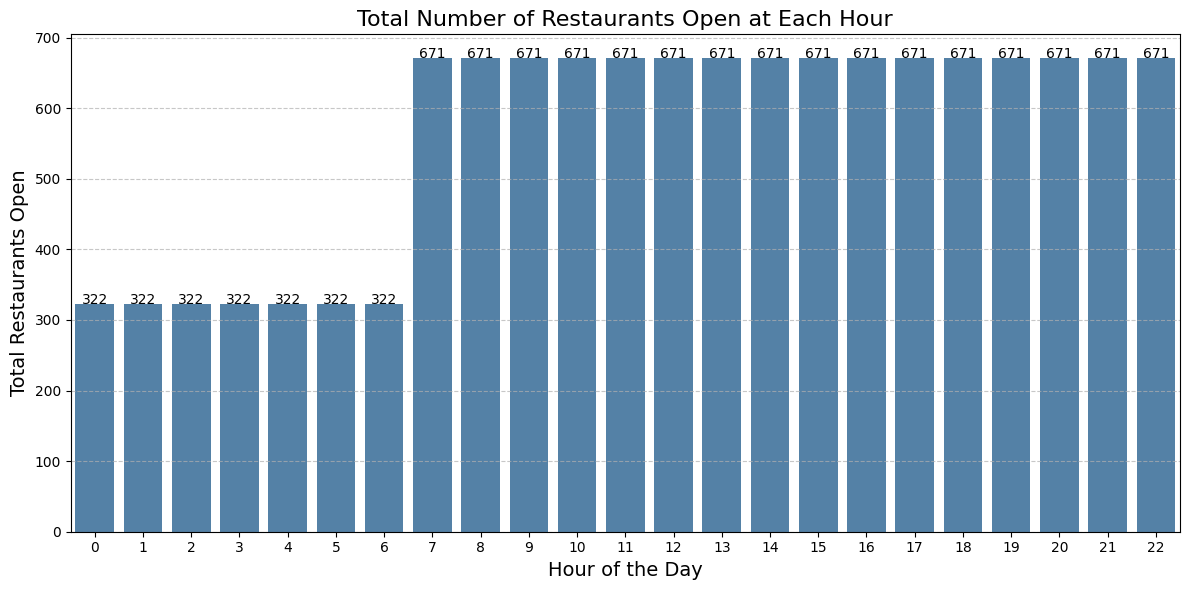

In [352]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=df_hour_restaurants, x='hour', y='total_open_restaurants', color='steelblue')

# Adding labels on each bar
for index, row in df_hour_restaurants.iterrows():
    plt.text(index, row['total_open_restaurants'] + 0.5, f"{row['total_open_restaurants']}", ha='center')

# Enhancing the plot
plt.title('Total Number of Restaurants Open at Each Hour', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Total Restaurants Open', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [353]:
df_restaurants['opening_time'].unique(), df_restaurants['closing_time'].unique()

(array(['07:00:00', '00:00:00', '12:00:00'], dtype=object),
 array(['22:00:00', '23:59:00', '00:00:00'], dtype=object))

#### Top Restaurants and their performance 

In [355]:
# reading menu data
query = '''  
select * 
from Menu
'''

df_menu = pd.read_sql(query, conn)
print(df_menu.shape)
df_menu.head()

(10122, 6)


,MenuItemID,RestaurantID,ItemName,Category,Price,Description
0,1,1,Caesar Salad,Side Dish,97.0,A delicious side dish item.
1,2,1,Buffalo Wings,Main Course,291.0,A delicious main course item.
2,3,1,Cheeseburger,Side Dish,53.0,A delicious side dish item.
3,4,1,Apple Pie,Beverage,73.0,A delicious beverage item.
4,5,1,Fries,Main Course,484.0,A delicious main course item.


In [356]:
print(df_menu.dtypes)
print(df_menu.isna().sum())

MenuItemID        int64
RestaurantID      int64
ItemName         object
Category         object
Price           float64
Description      object
dtype: object
MenuItemID        0
RestaurantID      0
ItemName          0
Category          0
Price           106
Description       0
dtype: int64


In [357]:
# We will fill median price of same item to fiil null values in price column, this will be good approximation 

df_menu_grp = df_menu.groupby(['ItemName']).agg(median_price = ('Price', 'median')).reset_index()

print(df_menu_grp.shape)
df_menu_grp.head()


(71, 2)


,ItemName,median_price
0,Apple Pie,94.0
1,Baklava,126.0
2,Beef Bourguignon,101.0
3,Bruschetta,101.0
4,Buffalo Wings,112.0


In [358]:
df_menu = df_menu.merge(df_menu_grp, on = ['ItemName'], how = 'left')
print(df_menu.shape)
df_menu.head(3)

(10122, 7)


,MenuItemID,RestaurantID,ItemName,Category,Price,Description,median_price
0,1,1,Caesar Salad,Side Dish,97.0,A delicious side dish item.,98.0
1,2,1,Buffalo Wings,Main Course,291.0,A delicious main course item.,112.0
2,3,1,Cheeseburger,Side Dish,53.0,A delicious side dish item.,100.0


In [359]:
# replaccing null with median price value of corrosponding Item
df_menu.loc[df_menu['Price'].isna(), 'Price'] = df_menu['median_price']

print(df_menu.shape)
print(df_menu.isna().sum())

(10122, 7)
MenuItemID      0
RestaurantID    0
ItemName        0
Category        0
Price           0
Description     0
median_price    0
dtype: int64


In [366]:
# reading ordered item details
query = '''  

select oi.*, r.RestaurantID, o.Order_timestamp
from Order_Items as oi
left join Orders as o on o.OrderID = oi.OrderID
left join Restaurants as r on r.RestaurantID = o.RestaurantID
where DATE(Order_timestamp) between '2023-07-01' and '2023-12-31'
'''

df_items_sold_by_rest = pd.read_sql(query, conn)

print(df_items_sold_by_rest.shape)
print(df_items_sold_by_rest.dtypes)
print(df_items_sold_by_rest.isna().sum())

df_items_sold_by_rest.head()

(137626, 6)
OrderItemID         int64
OrderID             int64
MenuItemID          int64
Quantity            int64
RestaurantID        int64
Order_timestamp    object
dtype: object
OrderItemID        0
OrderID            0
MenuItemID         0
Quantity           0
RestaurantID       0
Order_timestamp    0
dtype: int64


,OrderItemID,OrderID,MenuItemID,Quantity,RestaurantID,Order_timestamp
0,1,1,573,3,863,2023-11-19 15:25:54
1,2,1,9149,2,863,2023-11-19 15:25:54
2,3,1,1710,1,863,2023-11-19 15:25:54
3,4,1,7699,1,863,2023-11-19 15:25:54
4,5,1,2922,2,863,2023-11-19 15:25:54


In [367]:
# merging df_restaurants to get restaurant name 
df_items_sold_by_rest = df_items_sold_by_rest.merge(df_restaurants[['RestaurantID', 'Name']] , on = ['RestaurantID'], how = 'left')
print(df_items_sold_by_rest.shape)
print(df_items_sold_by_rest.dtypes)
print(df_items_sold_by_rest.isna().sum())

df_items_sold_by_rest.head()

(137626, 7)
OrderItemID         int64
OrderID             int64
MenuItemID          int64
Quantity            int64
RestaurantID        int64
Order_timestamp    object
Name               object
dtype: object
OrderItemID        0
OrderID            0
MenuItemID         0
Quantity           0
RestaurantID       0
Order_timestamp    0
Name               0
dtype: int64


,OrderItemID,OrderID,MenuItemID,Quantity,RestaurantID,Order_timestamp,Name
0,1,1,573,3,863,2023-11-19 15:25:54,Spice Route
1,2,1,9149,2,863,2023-11-19 15:25:54,Spice Route
2,3,1,1710,1,863,2023-11-19 15:25:54,Spice Route
3,4,1,7699,1,863,2023-11-19 15:25:54,Spice Route
4,5,1,2922,2,863,2023-11-19 15:25:54,Spice Route


In [368]:
# merging df_menu to get item name and price for each item
df_items_sold_by_rest = df_items_sold_by_rest.merge(df_menu[['MenuItemID', 'ItemName', 'Price']] , on = ['MenuItemID'], how = 'left')
print(df_items_sold_by_rest.shape)
print(df_items_sold_by_rest.dtypes)
print(df_items_sold_by_rest.isna().sum())

df_items_sold_by_rest.head()

(137626, 9)
OrderItemID          int64
OrderID              int64
MenuItemID           int64
Quantity             int64
RestaurantID         int64
Order_timestamp     object
Name                object
ItemName            object
Price              float64
dtype: object
OrderItemID        0
OrderID            0
MenuItemID         0
Quantity           0
RestaurantID       0
Order_timestamp    0
Name               0
ItemName           0
Price              0
dtype: int64


,OrderItemID,OrderID,MenuItemID,Quantity,RestaurantID,Order_timestamp,Name,ItemName,Price
0,1,1,573,3,863,2023-11-19 15:25:54,Spice Route,Butter Naan,54.0
1,2,1,9149,2,863,2023-11-19 15:25:54,Spice Route,Macaron,180.0
2,3,1,1710,1,863,2023-11-19 15:25:54,Spice Route,Gulab Jamun,73.0
3,4,1,7699,1,863,2023-11-19 15:25:54,Spice Route,Dal Makhani,165.0
4,5,1,2922,2,863,2023-11-19 15:25:54,Spice Route,Butter Naan,81.0


In [369]:
# top 5 restaurants by their items total quantity in last 6 month orders
df_items_sold_by_rest_grp = df_items_sold_by_rest.groupby(['RestaurantID', 'Name']).agg(total_qty = ('Quantity', 'sum')).reset_index()

df_items_sold_by_rest_grp = df_items_sold_by_rest_grp.sort_values(by = ['total_qty'], ascending = False).head(5)

print(df_items_sold_by_rest_grp.shape)
df_items_sold_by_rest_grp.head()

(5, 3)


,RestaurantID,Name,total_qty
373,374,Café Aroma,481
237,238,South Delight,441
688,689,Tandoor Flame,419
262,263,Carnival Café,415
284,285,Korma Kitchen,413


In [370]:
df_items_sold_by_rest_grp['ID_NAME'] = df_items_sold_by_rest_grp['RestaurantID'].astype(str) + " " + df_items_sold_by_rest_grp['Name']
df_items_sold_by_rest_grp

,RestaurantID,Name,total_qty,ID_NAME
373,374,Café Aroma,481,374 Café Aroma
237,238,South Delight,441,238 South Delight
688,689,Tandoor Flame,419,689 Tandoor Flame
262,263,Carnival Café,415,263 Carnival Café
284,285,Korma Kitchen,413,285 Korma Kitchen


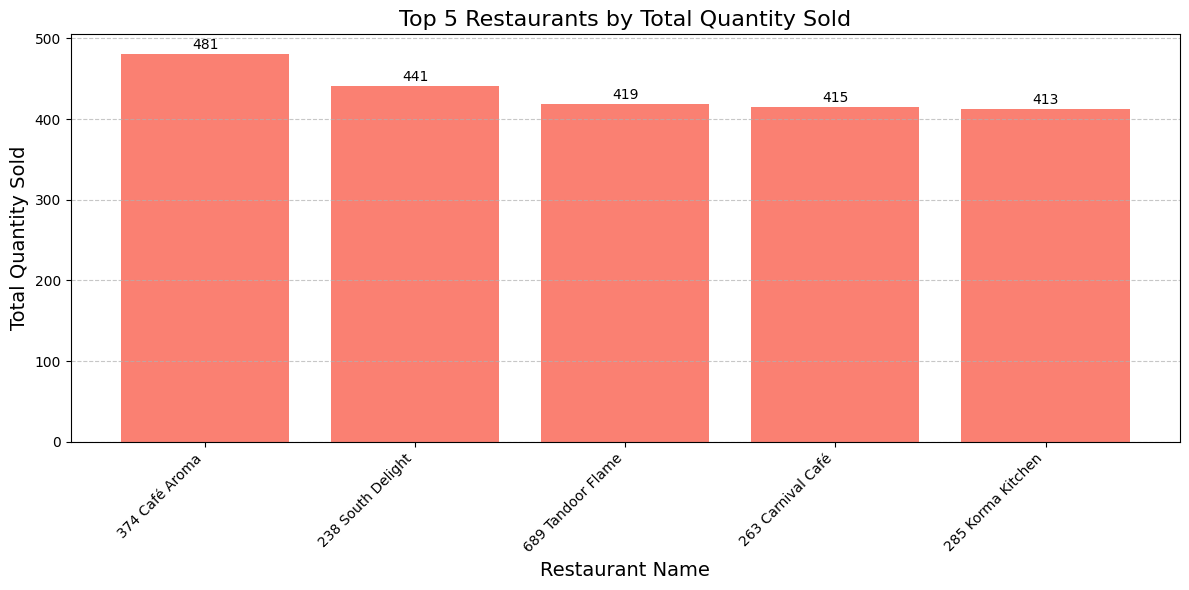

In [371]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_items_sold_by_rest_grp['ID_NAME'], df_items_sold_by_rest_grp['total_qty'], color='salmon')

# Add total_qty values above the bars
for bar, qty in zip(bars, df_items_sold_by_rest_grp['total_qty']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        str(qty),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Enhancing the plot
plt.title('Top 5 Restaurants by Total Quantity Sold', fontsize=16)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Total Quantity Sold', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [372]:
# top 5 restaurants by their revenue in last 6 month orders
df_items_sold_by_rest_grp = df_items_sold_by_rest.groupby(['RestaurantID', 'Name']).agg(total_revenue = ('Price', 'sum')).reset_index()

df_items_sold_by_rest_grp = df_items_sold_by_rest_grp.sort_values(by = ['total_revenue'], ascending = False).head(5)

print(df_items_sold_by_rest_grp.shape)
df_items_sold_by_rest_grp.head()

(5, 3)


,RestaurantID,Name,total_revenue
373,374,Café Aroma,32659.0
237,238,South Delight,29926.0
843,844,The Mughal Court,28165.0
284,285,Korma Kitchen,26867.0
338,339,Unknown Restaurant 7,26757.5


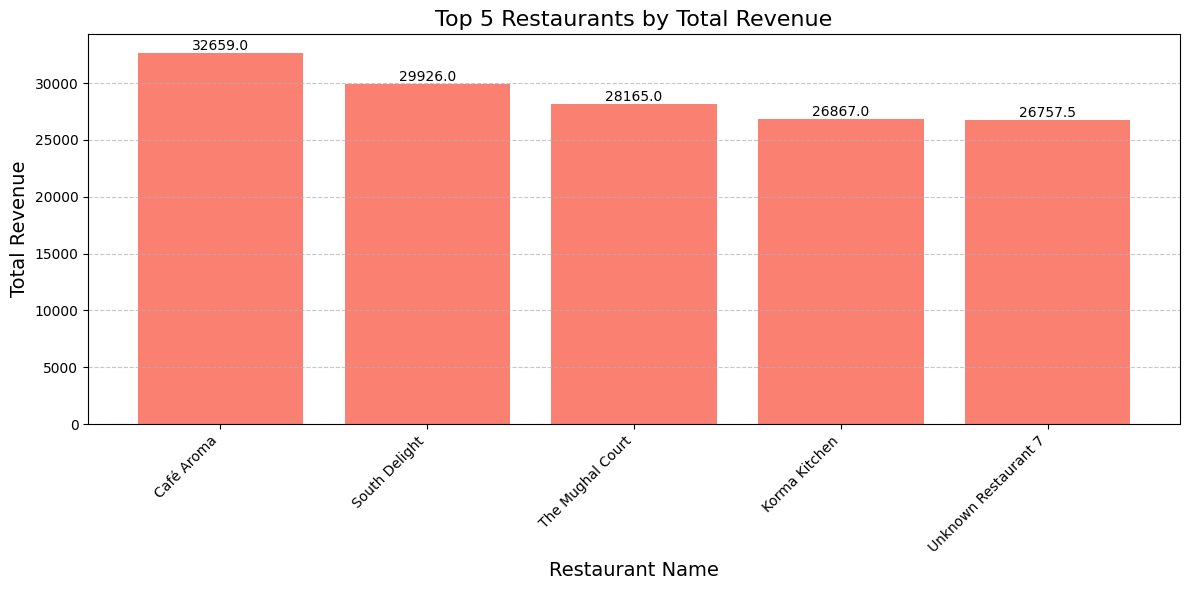

In [373]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_items_sold_by_rest_grp['Name'], df_items_sold_by_rest_grp['total_revenue'], color='salmon')

# Add total_qty values above the bars
for bar, qty in zip(bars, df_items_sold_by_rest_grp['total_revenue']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 2,
        str(qty),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Enhancing the plot
plt.title('Top 5 Restaurants by Total Revenue', fontsize=16)
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [374]:
df_items_sold_by_rest.head(2)

,OrderItemID,OrderID,MenuItemID,Quantity,RestaurantID,Order_timestamp,Name,ItemName,Price
0,1,1,573,3,863,2023-11-19 15:25:54,Spice Route,Butter Naan,54.0
1,2,1,9149,2,863,2023-11-19 15:25:54,Spice Route,Macaron,180.0


In [375]:
# total revenue trend of these top 5 restaurants in last 6 months 

top_5_restaurants = list(df_items_sold_by_rest_grp['RestaurantID'].to_list())

df_items_sold_by_rest_top_5_rest = df_items_sold_by_rest[df_items_sold_by_rest['RestaurantID'].isin(top_5_restaurants)].copy()

df_items_sold_by_rest_top_5_rest['order_month'] = pd.to_datetime(df_items_sold_by_rest_top_5_rest['Order_timestamp']).dt.to_period('M')

df_items_sold_by_rest_top_5_rest_grp = df_items_sold_by_rest_top_5_rest.groupby(['RestaurantID', 'Name', 'order_month']).agg(total_revenue = ('Price', 'sum')).reset_index()


print(df_items_sold_by_rest_top_5_rest_grp.shape)
df_items_sold_by_rest_top_5_rest_grp.head()

(30, 4)


,RestaurantID,Name,order_month,total_revenue
0,238,South Delight,2023-07,1663.0
1,238,South Delight,2023-08,2242.0
2,238,South Delight,2023-09,6050.0
3,238,South Delight,2023-10,3489.0
4,238,South Delight,2023-11,7275.0


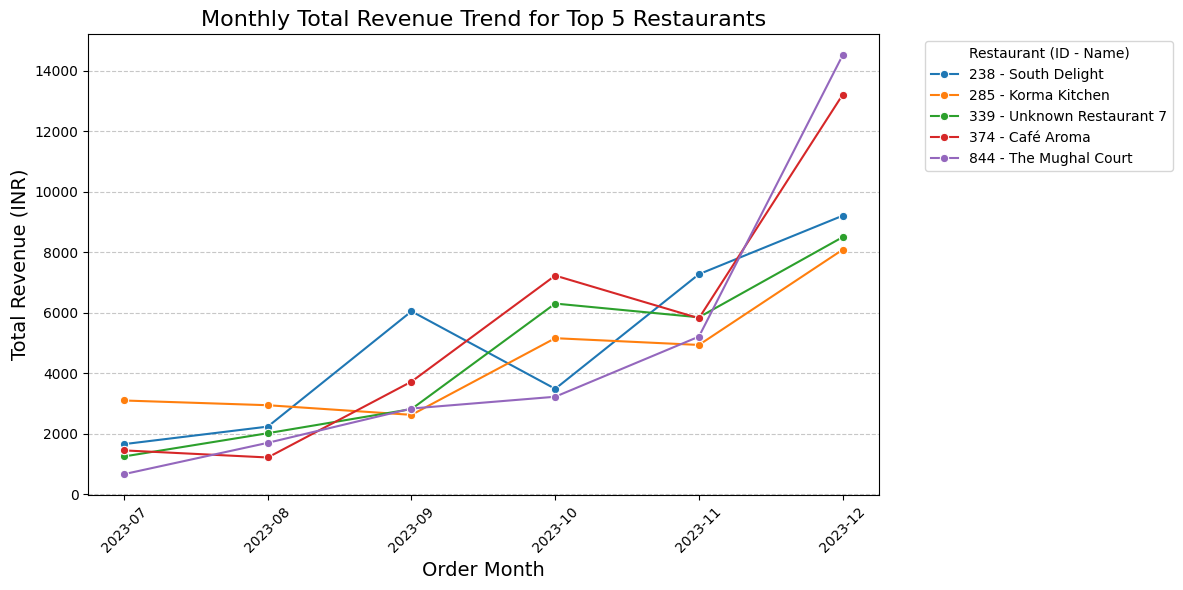

In [376]:
# Combining RestaurantID and Name for better identification
df_items_sold_by_rest_top_5_rest_grp['Restaurant_Identity'] = (
    df_items_sold_by_rest_top_5_rest_grp['RestaurantID'].astype(str) + " - " +
    df_items_sold_by_rest_top_5_rest_grp['Name']
)

df_items_sold_by_rest_top_5_rest_grp['Restaurant_Identity'] = df_items_sold_by_rest_top_5_rest_grp['Restaurant_Identity'].astype('category')
df_items_sold_by_rest_top_5_rest_grp['order_month'] = df_items_sold_by_rest_top_5_rest_grp['order_month'].astype('str')


# Plotting the revenue trend for each restaurant
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_items_sold_by_rest_top_5_rest_grp,
    x='order_month',
    y='total_revenue',
    hue='Restaurant_Identity',
    marker='o'
)

# Enhancing the plot
plt.title('Monthly Total Revenue Trend for Top 5 Restaurants', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total Revenue (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Restaurant (ID - Name)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Items Analysis 

#### Popular item in each city

In [377]:
query = ''' 

select oi.*, m.ItemName, c.city
from Order_Items as oi
left join Menu as m on m.MenuItemID = oi.MenuItemID
left join Orders as o on o.OrderID = oi.OrderID 
left join Customers as c on c.customer_id = o.CustomerID
where DATE(Order_timestamp) between '2023-01-01' and '2023-12-31'

'''

df_ordered_items = pd.read_sql(query, conn)
print(df_ordered_items.shape)
df_ordered_items.head()

(150723, 6)


,OrderItemID,OrderID,MenuItemID,Quantity,ItemName,city
0,1,1,573,3,Butter Naan,Thane
1,2,1,9149,2,Macaron,Thane
2,3,1,1710,1,Gulab Jamun,Thane
3,4,1,7699,1,Dal Makhani,Thane
4,5,1,2922,2,Butter Naan,Thane


In [378]:
print(df_ordered_items.dtypes)
print(df_ordered_items.isna().sum())

OrderItemID     int64
OrderID         int64
MenuItemID      int64
Quantity        int64
ItemName       object
city           object
dtype: object
OrderItemID    0
OrderID        0
MenuItemID     0
Quantity       0
ItemName       0
city           0
dtype: int64


In [379]:
# calculating total quantity sold of each item in each city
df_ordered_items_grp = df_ordered_items.groupby(['city', 'ItemName']).agg(total_qty = ('Quantity', 'sum')).reset_index()
print(df_ordered_items_grp.shape)
df_ordered_items_grp.head()

(2556, 3)


,city,ItemName,total_qty
0,Agra,Apple Pie,27
1,Agra,Baklava,78
2,Agra,Beef Bourguignon,49
3,Agra,Bruschetta,68
4,Agra,Buffalo Wings,33


In [380]:
pd.set_option('display.max_rows', 10000)

# Assigning rank to each item in each city
df_ordered_items_grp['rank'] =  df_ordered_items_grp.groupby(['city'])['total_qty'].rank(method='first', ascending=False)
df_ordered_items_grp.sort_values(by = ['city', 'total_qty'], ascending=False, inplace = True)

df_ordered_items_grp.head()

,city,ItemName,total_qty,rank
2495,Vasai,Chicken Tikka Masala,553,1.0
2534,Vasai,Paneer Butter Masala,549,2.0
2501,Vasai,Dal Makhani,544,3.0
2491,Vasai,Butter Naan,535,4.0
2514,Vasai,Gulab Jamun,525,5.0


In [381]:
# filtering popular item for each city as per total quantity sold
df_ordered_items_grp = df_ordered_items_grp[df_ordered_items_grp['rank']==1].copy()
print(df_ordered_items_grp.shape)
df_ordered_items_grp.head()

(36, 4)


,city,ItemName,total_qty,rank
2495,Vasai,Chicken Tikka Masala,553,1.0
2463,Varanasi,Paneer Butter Masala,568,1.0
2378,Vadodara,Lassi,612,1.0
2288,Thane,Dal Makhani,592,1.0
2207,Surat,Butter Naan,651,1.0


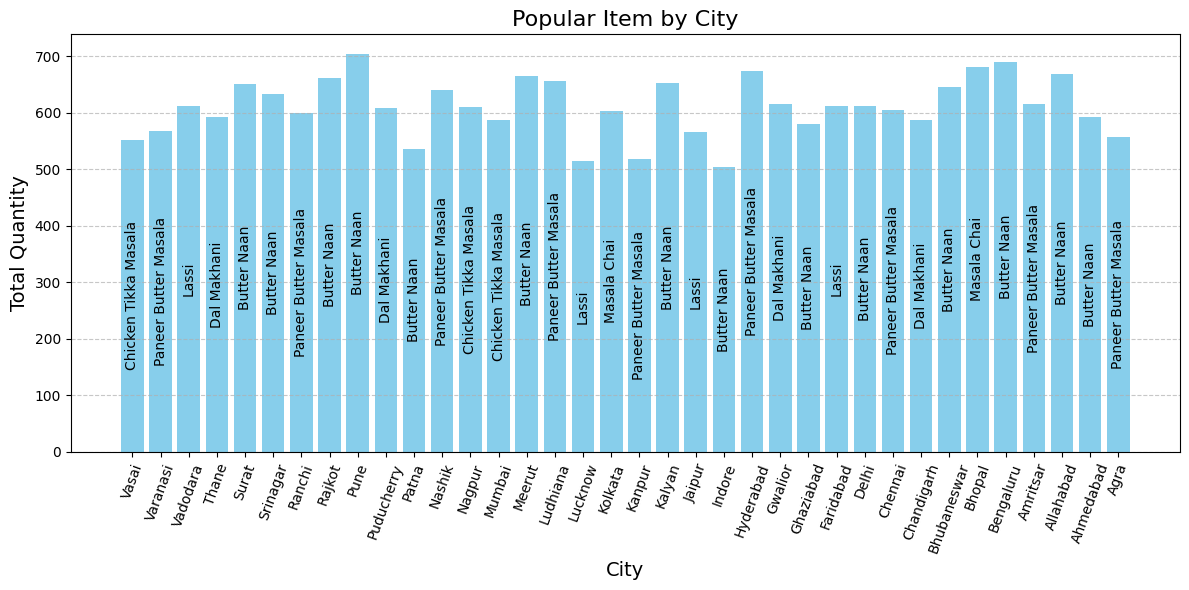

In [382]:
# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df_ordered_items_grp['city'], df_ordered_items_grp['total_qty'], color='skyblue')

# Add item names vertically on the bars
for bar, item_name in zip(bars, df_ordered_items_grp['ItemName']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        item_name,
        ha='center',
        va='center',
        rotation='vertical',
        fontsize=10,
        color='black'
    )

# Enhancing the plot
plt.title('Popular Item by City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Total Quantity', fontsize=14)
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### top 10 items - most commonly available across restaurants

In [383]:
overall_restaurants = df_menu['RestaurantID'].nunique()

df_menu_grp = df_menu.groupby(['ItemName']).agg(total_restaurants = ('RestaurantID', 'nunique')).reset_index()

df_menu_grp['pct_restaurants'] = df_menu_grp['total_restaurants']*100/overall_restaurants

df_menu_grp.sort_values(by = ['pct_restaurants'], ascending=False, inplace=True)

print(df_menu_grp.shape)
df_menu_grp.head()

(71, 3)


,ItemName,total_restaurants,pct_restaurants
49,Paneer Butter Masala,398,39.8
58,Samosa,391,39.1
6,Butter Naan,385,38.5
10,Chicken Tikka Masala,384,38.4
41,Masala Chai,378,37.8


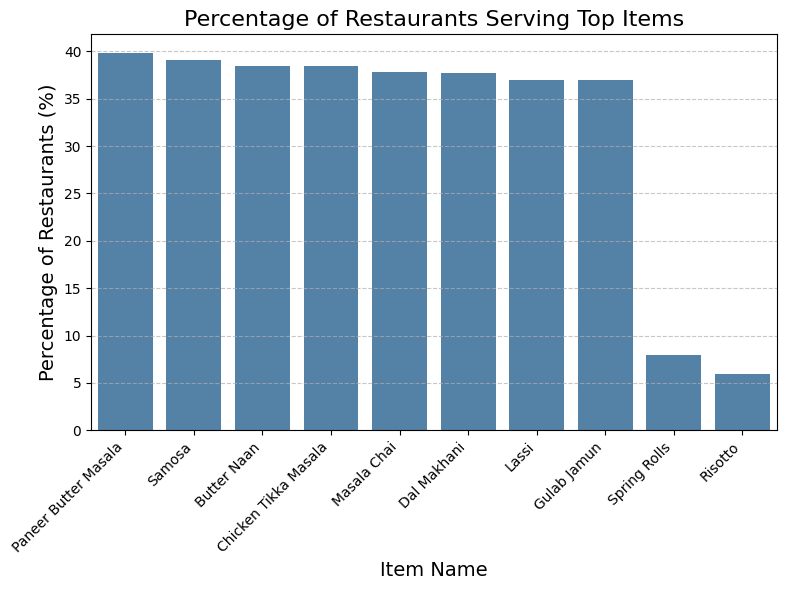

In [385]:
df_menu_grp_top_10 = df_menu_grp.head(10)

# Plotting the percentage of restaurants for each item
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_menu_grp_top_10,
    x='ItemName',
    y='pct_restaurants',
    color='steelblue'
)

# Enhancing the plot
plt.title('Percentage of Restaurants Serving Top Items', fontsize=16)
plt.xlabel('Item Name', fontsize=14)
plt.ylabel('Percentage of Restaurants (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Orders Analysis

#### State-wise Top Restaurants and Their Total Orders

In [386]:
df_orders.head()

,OrderID,CustomerID,RestaurantID,Order_timestamp
0,1,11295,863,2023-11-19 15:25:54
1,2,4200,999,2023-08-24 14:48:23
2,3,4200,388,2023-10-13 18:51:26
3,4,4200,37,2023-09-07 22:39:28
4,5,7664,814,2023-11-22 22:48:53


In [388]:
# merging df_restaurants to get restaurant name and state
df_orders_rest = df_orders.merge(df_restaurants[['RestaurantID', 'Name', 'state']] , on = ['RestaurantID'], how = 'left')

print(df_orders_rest.shape)
df_orders_rest.head()

(50108, 6)


,OrderID,CustomerID,RestaurantID,Order_timestamp,Name,state
0,1,11295,863,2023-11-19 15:25:54,Spice Route,Odisha
1,2,4200,999,2023-08-24 14:48:23,Carnival Café,Madhya Pradesh
2,3,4200,388,2023-10-13 18:51:26,Urban Café,Gujarat
3,4,4200,37,2023-09-07 22:39:28,China Town,Uttar Pradesh
4,5,7664,814,2023-11-22 22:48:53,Mumbai Magic,Uttar Pradesh


In [389]:
df_orders_rest_grp = df_orders_rest.groupby(['state', 'RestaurantID', 'Name']).agg(total_orders = ('OrderID', 'count')).reset_index()

df_orders_rest_grp['rank'] = df_orders_rest_grp.groupby(['state'])['total_orders'].rank(method='first', ascending=False)
df_orders_rest_grp.sort_values(by = ['state', 'total_orders'], ascending=False, inplace=True)

df_orders_rest_grp.head(10)

,state,RestaurantID,Name,total_orders,rank
971,West Bengal,263,Carnival Café,71,1.0
967,West Bengal,71,China Town,65,2.0
975,West Bengal,339,Unknown Restaurant 7,65,3.0
993,West Bengal,791,Café Taj,63,4.0
981,West Bengal,479,House of Dosa,62,5.0
972,West Bengal,279,Taste of India,61,6.0
995,West Bengal,881,South Delight,60,7.0
980,West Bengal,475,China Town,59,8.0
973,West Bengal,308,Chopsticks Delight,57,9.0
991,West Bengal,699,Sunset Grill,57,10.0


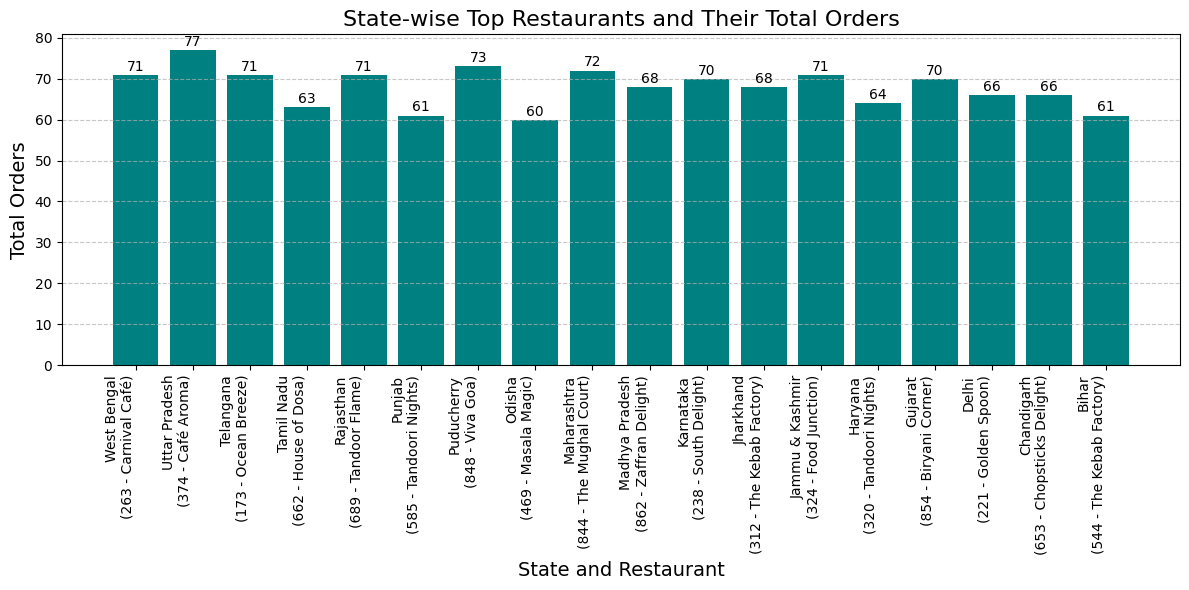

In [390]:
df_orders_rest_grp = df_orders_rest_grp[df_orders_rest_grp['rank']==1].copy()

# Combine state, RestaurantID, and Name for better identification
df_orders_rest_grp['State_Restaurant'] = (
    df_orders_rest_grp['state'] + "\n(" + df_orders_rest_grp['RestaurantID'].astype(str) + " - " + df_orders_rest_grp['Name'] + ")"
)

# Plotting state-wise restaurants along with total orders
plt.figure(figsize=(12, 6))
bars = plt.bar(df_orders_rest_grp['State_Restaurant'], df_orders_rest_grp['total_orders'], color='teal')

# Adding total order values above the bars
for bar, total_orders in zip(bars, df_orders_rest_grp['total_orders']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 1,
        str(total_orders),
        ha='center',
        fontsize=10
    )

# Enhancing the plot
plt.title('State-wise Top Restaurants and Their Total Orders', fontsize=16)
plt.xlabel('State and Restaurant', fontsize=14)
plt.ylabel('Total Orders', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [245]:
df_orders.head()

,OrderID,CustomerID,RestaurantID,Order_timestamp
0,1,11295,863,2023-11-19 15:25:54
1,2,4200,999,2023-08-24 14:48:23
2,3,4200,388,2023-10-13 18:51:26
3,4,4200,37,2023-09-07 22:39:28
4,5,7664,814,2023-11-22 22:48:53


#### Percentage of Orders Received at Every Hour of the Day

In [391]:
# making copy of data
df_orders_copy = df_orders.copy()


# extracting order hour and month from timestamp
df_orders_copy['order_hour'] = pd.to_datetime(df_orders_copy['Order_timestamp']).dt.hour
df_orders_copy['order_month'] = pd.to_datetime(df_orders_copy['Order_timestamp']).dt.month


print(df_orders_copy['Order_timestamp'].min(), df_orders_copy['Order_timestamp'].max())


print(df_orders_copy.shape)
df_orders_copy.head()

2023-01-05 13:32:45 2023-12-31 22:58:43
(50108, 6)


,OrderID,CustomerID,RestaurantID,Order_timestamp,order_hour,order_month
0,1,11295,863,2023-11-19 15:25:54,15,11
1,2,4200,999,2023-08-24 14:48:23,14,8
2,3,4200,388,2023-10-13 18:51:26,18,10
3,4,4200,37,2023-09-07 22:39:28,22,9
4,5,7664,814,2023-11-22 22:48:53,22,11


In [392]:
# Using only last 6 month data for this analysis
df_orders_copy = df_orders_copy[df_orders_copy['order_month']>=7].copy()

# calculating total orders receiveing at every hout
df_orders_copy_grp = df_orders_copy.groupby(['order_hour']).agg(total_orders = ('OrderID', 'count')).reset_index()
df_orders_copy_grp['pct_orders'] = df_orders_copy_grp['total_orders']*100/df_orders_copy_grp['total_orders'].sum()

print(df_orders_copy_grp.shape)
df_orders_copy_grp.head()

(9, 3)


,order_hour,total_orders,pct_orders
0,12,5750,12.565010
1,13,5654,12.355229
2,14,5740,12.543158
3,15,5659,12.366155
4,18,4500,9.833486


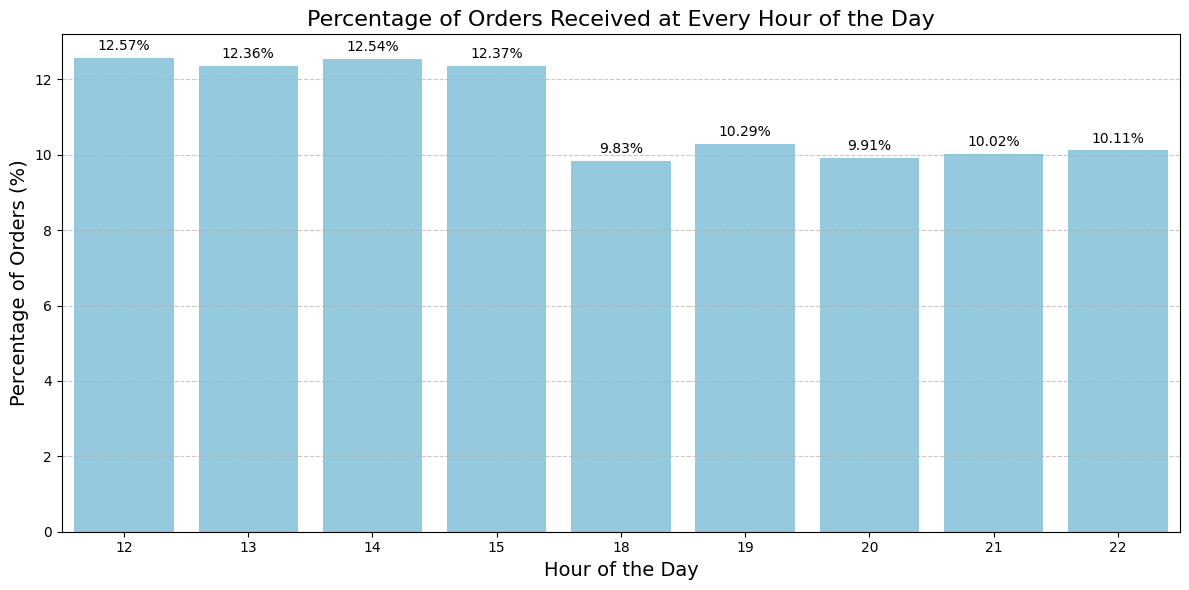

In [393]:
# Plotting percentage of orders received at every hour of the day
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_orders_copy_grp,
    x='order_hour',
    y='pct_orders',
    color='skyblue'
)

# Adding percentage labels above the bars
for index, row in df_orders_copy_grp.iterrows():
    plt.text(
        index,
        row['pct_orders'] + 0.2,
        f"{row['pct_orders']:.2f}%",
        ha='center',
        fontsize=10
    )

# Enhancing the plot
plt.title('Percentage of Orders Received at Every Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Percentage of Orders (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Payment Analysis

In [394]:
# reading last 6 months payment details
query = ''' 
select p.*, o.Order_timestamp
from Payments as p
left join Orders as o on o.OrderID=p.OrderID
where Date(Payment_Timestamp) between '2023-07-01' and '2023-12-31'
'''

df_pay_orders = pd.read_sql(query, conn)

print(df_pay_orders.shape)
print(df_pay_orders.dtypes)
print(df_pay_orders.isna().sum())

df_pay_orders.head()

(45762, 6)
PaymentID             int64
OrderID               int64
PaymentMethod        object
Payment_Timestamp    object
Amount                int64
Order_timestamp      object
dtype: object
PaymentID            0
OrderID              0
PaymentMethod        0
Payment_Timestamp    0
Amount               0
Order_timestamp      0
dtype: int64


,PaymentID,OrderID,PaymentMethod,Payment_Timestamp,Amount,Order_timestamp
0,1,1,UPI,2023-11-19 15:26:59,1350,2023-11-19 15:25:54
1,2,2,Wallet,2023-08-24 14:49:29,300,2023-08-24 14:48:23
2,3,3,Wallet,2023-10-13 18:53:49,150,2023-10-13 18:51:26
3,4,4,Debit Card,2023-09-07 22:43:01,150,2023-09-07 22:39:28
4,5,5,UPI,2023-11-22 22:49:44,600,2023-11-22 22:48:53


#### Payment Method distribution 

In [395]:
df_pay_orders_grp = df_pay_orders.groupby(['PaymentMethod']).agg(total_payments = ('PaymentID', 'sum')).reset_index()

df_pay_orders_grp['pct_payments'] = df_pay_orders_grp['total_payments']*100/df_pay_orders_grp['total_payments'].sum()

df_pay_orders_grp

,PaymentMethod,total_payments,pct_payments
0,Cash,232824257,20.293295
1,Credit Card,202441369,17.645079
2,Debit Card,115771631,10.090821
3,Net Banking,45366007,3.954166
4,UPI,387861740,33.806583
5,Wallet,163031472,14.210056


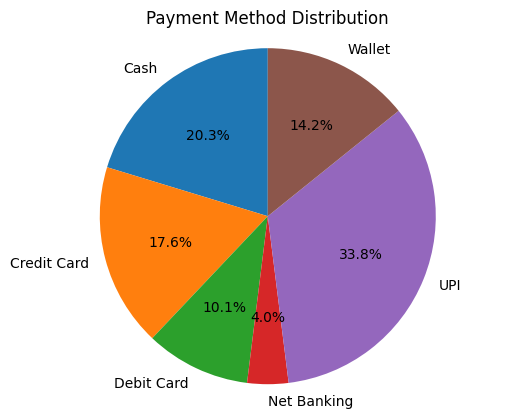

In [396]:
# Create the pie chart
fig, ax = plt.subplots()
ax.pie(df_pay_orders_grp["pct_payments"], labels=df_pay_orders_grp["PaymentMethod"], autopct='%1.1f%%', startangle=90)
ax.set_title("Payment Method Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.show()

#### Payment timestamp wrt order timestamp

In [397]:
df_pay_orders['Order_timestamp'] = pd.to_datetime(df_pay_orders['Order_timestamp'])
df_pay_orders['Payment_Timestamp'] = pd.to_datetime(df_pay_orders['Payment_Timestamp'])

# Calculate difference in seconds
df_pay_orders["time_difference_seconds"] = (df_pay_orders["Payment_Timestamp"] - df_pay_orders["Order_timestamp"]).dt.total_seconds()

print(df_pay_orders.shape)
df_pay_orders.head()

(45762, 7)


,PaymentID,OrderID,PaymentMethod,Payment_Timestamp,Amount,Order_timestamp,time_difference_seconds
0,1,1,UPI,2023-11-19 15:26:59,1350,2023-11-19 15:25:54,65.0
1,2,2,Wallet,2023-08-24 14:49:29,300,2023-08-24 14:48:23,66.0
2,3,3,Wallet,2023-10-13 18:53:49,150,2023-10-13 18:51:26,143.0
3,4,4,Debit Card,2023-09-07 22:43:01,150,2023-09-07 22:39:28,213.0
4,5,5,UPI,2023-11-22 22:49:44,600,2023-11-22 22:48:53,51.0


In [398]:
# looking as stats
df_pay_orders[['time_difference_seconds']].describe()

,time_difference_seconds
count,45762.000000
mean,60.646213
std,60.147380
min,1.000000
25%,18.000000
50%,42.000000
75%,84.000000
max,600.000000


## Delivery Analysis

In [399]:
# Reading Delivery Partners data
query = '''  

select * 
from Delivery_Partners

'''

df_delivery_partners = pd.read_sql(query, conn)

print(df_delivery_partners.shape)
print(df_delivery_partners.dtypes)
print(df_delivery_partners.isna().sum())

df_delivery_partners.head()

(500, 8)
PartnerID       int64
First Name     object
Last Name      object
VehicleType    object
City           object
State          object
Country        object
Phone          object
dtype: object
PartnerID      0
First Name     0
Last Name      0
VehicleType    0
City           0
State          0
Country        0
Phone          0
dtype: int64


,PartnerID,First Name,Last Name,VehicleType,City,State,Country,Phone
0,1,Pawan,Saxena,Bike,Patna,Bihar,India,+91 9809415676
1,2,Amit,Patel,Bike,Surat,Gujarat,India,+91 9384288476
2,3,Vikram,Bose,Bike,Puducherry,Puducherry,India,+91 9917321582
3,4,Naresh,Gupta,Bike,Bhopal,Madhya Pradesh,India,+91 9439806587
4,5,Sunil,Bose,Bike,Vadodara,Gujarat,India,+91 9782359549


#### Distribution of Partners Across Each State

In [400]:
# Calculating total deliver partners for each state
df_delivery_partners_grp = df_delivery_partners.groupby(['State']).agg(total_partners = ('PartnerID', 'count')).reset_index()

df_delivery_partners_grp.head()


,State,total_partners
0,Bihar,17
1,Chandigarh,9
2,Delhi,9
3,Gujarat,46
4,Haryana,17


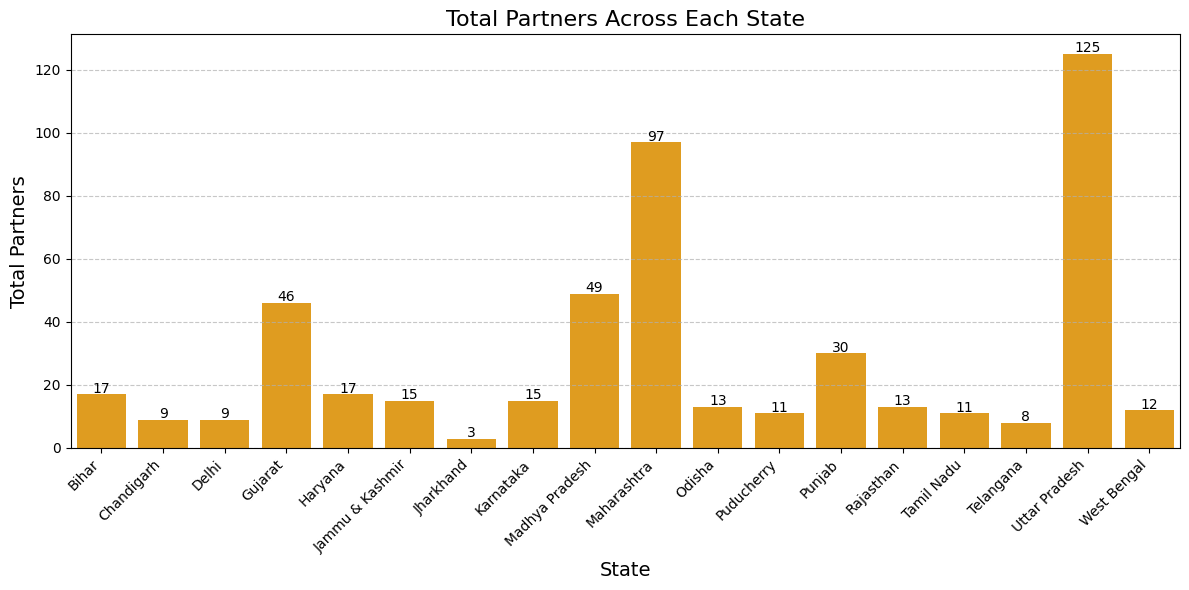

In [401]:
# Plotting total partners over each state
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_delivery_partners_grp,
    x='State',
    y='total_partners',
    color='orange'
)

# Adding total partner values above the bars
for index, row in df_delivery_partners_grp.iterrows():
    plt.text(
        index,
        row['total_partners'] + 0.5,
        str(row['total_partners']),
        ha='center',
        fontsize=10
    )

# Enhancing the plot
plt.title('Total Partners Across Each State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Partners', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [402]:
# Reading Delivery details for last 6 months
query = '''  

select d.* , c.state, c.city
from Delivery as d
left join Orders as o on o.OrderID = d.OrderID
left join Customers as c on c.customer_id = o.CustomerID
where date(PickupTimestamp) between '2023-07-01' and '2023-12-31'

'''

df_delivery = pd.read_sql(query, conn)

print(df_delivery.shape)
print(df_delivery.dtypes)
print(df_delivery.isna().sum())

df_delivery.head()

(45762, 9)
OrderID                int64
PartnerID              int64
PickupTimestamp       object
DeliveryTimestamp     object
Status                object
Distance             float64
VehicleType           object
state                 object
city                  object
dtype: object
OrderID              0
PartnerID            0
PickupTimestamp      0
DeliveryTimestamp    0
Status               0
Distance             0
VehicleType          0
state                0
city                 0
dtype: int64


,OrderID,PartnerID,PickupTimestamp,DeliveryTimestamp,Status,Distance,VehicleType,state,city
0,1,272,2023-11-19 15:54:54,2023-11-19 16:09:54,Failed,4.98,Bike,Maharashtra,Thane
1,2,87,2023-08-24 15:05:23,2023-08-24 15:23:23,Canceled,8.28,Bike,Delhi,Delhi
2,3,197,2023-10-13 19:04:26,2023-10-13 19:16:26,Failed,1.47,Bike,Delhi,Delhi
3,4,350,2023-09-07 23:04:28,2023-09-07 23:34:28,Canceled,13.51,Bike,Delhi,Delhi
4,5,481,2023-11-22 23:07:53,2023-11-22 23:25:53,Delivered,6.23,Car,Haryana,Faridabad


In [403]:
df_delivery['DeliveryTimestamp'] = pd.to_datetime(df_delivery['DeliveryTimestamp'])
df_delivery['PickupTimestamp'] = pd.to_datetime(df_delivery['PickupTimestamp'])

# Calculate difference in minutes
df_delivery["time_difference_minutes"] = (df_delivery["DeliveryTimestamp"] - df_delivery["PickupTimestamp"]).dt.total_seconds()/60


print(df_delivery.shape)
df_delivery.head()

(45762, 10)


,OrderID,PartnerID,PickupTimestamp,DeliveryTimestamp,Status,Distance,VehicleType,state,city,time_difference_minutes
0,1,272,2023-11-19 15:54:54,2023-11-19 16:09:54,Failed,4.98,Bike,Maharashtra,Thane,15.0
1,2,87,2023-08-24 15:05:23,2023-08-24 15:23:23,Canceled,8.28,Bike,Delhi,Delhi,18.0
2,3,197,2023-10-13 19:04:26,2023-10-13 19:16:26,Failed,1.47,Bike,Delhi,Delhi,12.0
3,4,350,2023-09-07 23:04:28,2023-09-07 23:34:28,Canceled,13.51,Bike,Delhi,Delhi,30.0
4,5,481,2023-11-22 23:07:53,2023-11-22 23:25:53,Delivered,6.23,Car,Haryana,Faridabad,18.0


#### Distribution of Delivery Status monthly 

In [404]:
# Extracting months
df_delivery['month'] = pd.to_datetime(df_delivery['PickupTimestamp']).dt.month 


df_delivery_grp = df_delivery.groupby(['month', 'Status']).agg(total_delivery = ('PartnerID', 'count')).reset_index()

print(df_delivery_grp.shape)
df_delivery_grp.head()

(18, 3)


,month,Status,total_delivery
0,7,Canceled,879
1,7,Delivered,846
2,7,Failed,822
3,8,Canceled,1165
4,8,Delivered,1180


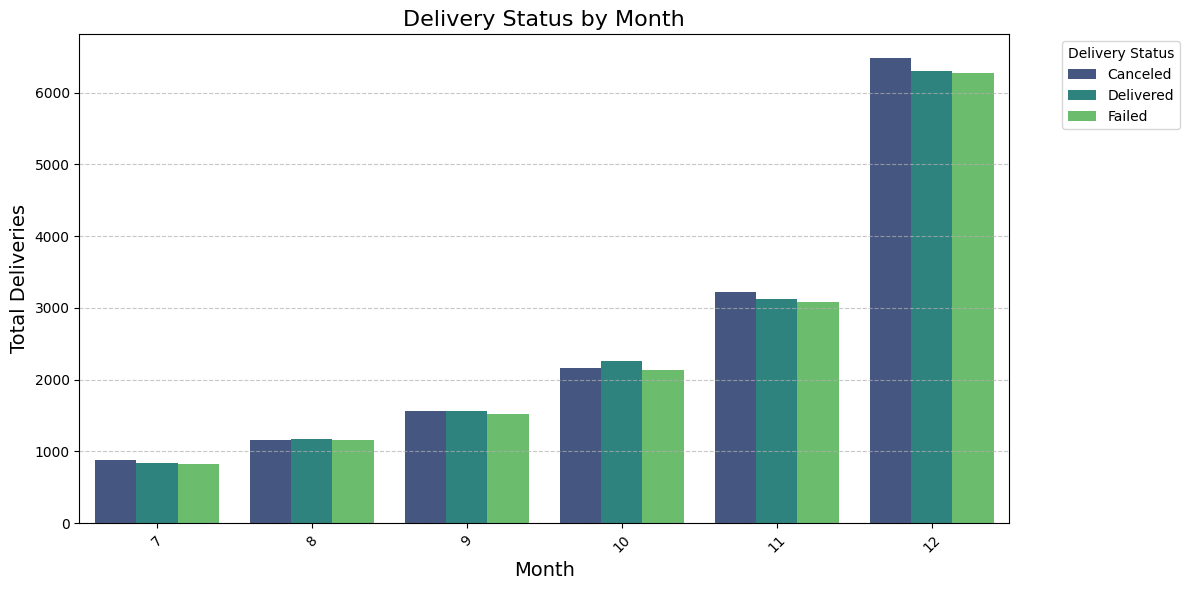

In [405]:
# Plotting parallel bar plot for delivery status by month
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_delivery_grp,
    x='month',
    y='total_delivery',
    hue='Status',
    palette='viridis'
)

# Enhancing the plot
plt.title('Delivery Status by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Deliveries', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Delivery Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Orders getting processed daily by partners for each state

In [406]:
df_delivery.head(2)

,OrderID,PartnerID,PickupTimestamp,DeliveryTimestamp,Status,Distance,VehicleType,state,city,time_difference_minutes,month
0,1,272,2023-11-19 15:54:54,2023-11-19 16:09:54,Failed,4.98,Bike,Maharashtra,Thane,15.0,11
1,2,87,2023-08-24 15:05:23,2023-08-24 15:23:23,Canceled,8.28,Bike,Delhi,Delhi,18.0,8


In [407]:
df_delivery['date'] = pd.to_datetime(df_delivery['PickupTimestamp']).dt.date

df_delivery_grp = df_delivery.groupby(['state']).agg(total_orders = ('OrderID', 'count'), total_partners = ('PartnerID', 'nunique'), total_days = ('date', 'nunique')).reset_index()

print(df_delivery_grp.shape)
df_delivery_grp.head()

(18, 4)


,state,total_orders,total_partners,total_days
0,Bihar,1126,460,176
1,Chandigarh,1236,444,174
2,Delhi,1222,452,173
3,Gujarat,5234,500,184
4,Haryana,1209,443,175


In [408]:
df_delivery_grp['order_per_parner_per_day'] = df_delivery_grp['total_orders']/(df_delivery_grp['total_partners']*df_delivery_grp['total_days'])

df_delivery_grp.head()

,state,total_orders,total_partners,total_days,order_per_parner_per_day
0,Bihar,1126,460,176,0.013908
1,Chandigarh,1236,444,174,0.015999
2,Delhi,1222,452,173,0.015627
3,Gujarat,5234,500,184,0.056891
4,Haryana,1209,443,175,0.015595


#### Deliver time taken across states

In [409]:
# Selecting/Filtering only Succesfull delivery 
df_delivery_filt = df_delivery[df_delivery['Status']=='Delivered'].copy()

# calculating avg time taken to delivery from pickup for each state
df_delivery_filt_grp = df_delivery_filt.groupby(['state']).agg(avg_delivery_time = ('time_difference_minutes', 'median')).reset_index()

df_delivery_filt_grp.head()

,state,avg_delivery_time
0,Bihar,20.0
1,Chandigarh,21.0
2,Delhi,19.0
3,Gujarat,20.0
4,Haryana,19.0


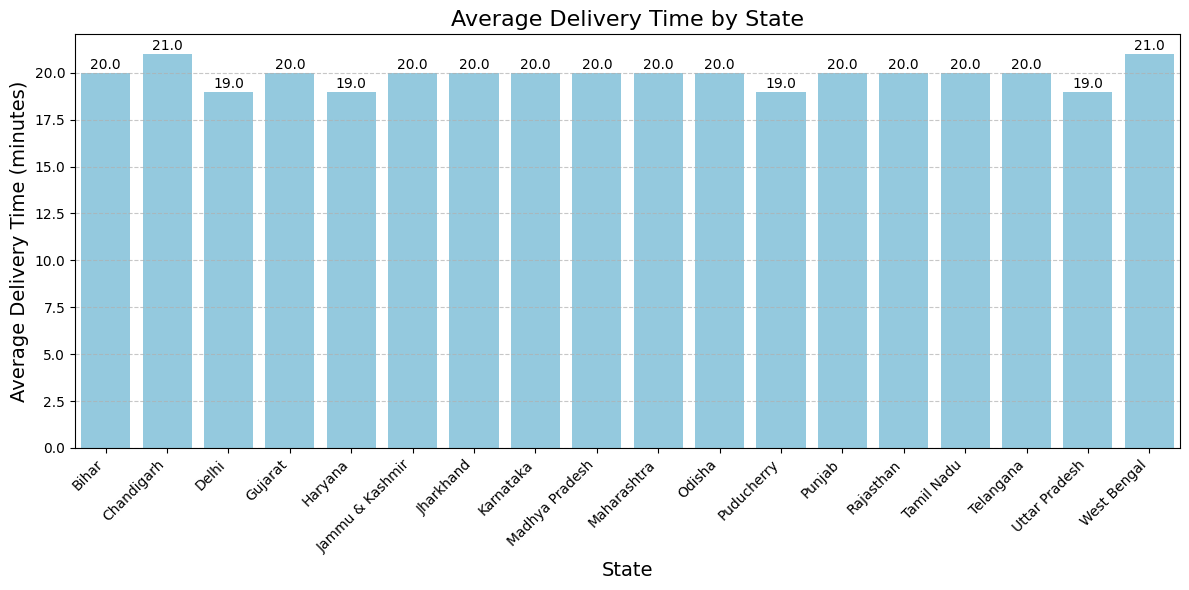

In [410]:
# Plotting average delivery time by state
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_delivery_filt_grp,
    x='state',
    y='avg_delivery_time',
    color='skyblue'
)

# Adding average delivery time labels above the bars
for index, row in df_delivery_filt_grp.iterrows():
    plt.text(
        index,
        row['avg_delivery_time'] + 0.2,
        f"{row['avg_delivery_time']:.1f}",
        ha='center',
        fontsize=10
    )

# Enhancing the plot
plt.title('Average Delivery Time by State', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Average Delivery Time (minutes)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Vehicle Performance 

In [411]:
# Checking vehicle percentage for delivery partners (Around 72% are using Bike and rest are using car for delivery)
df_delivery_partners['VehicleType'].value_counts(normalize=True)

VehicleType
Bike    0.724
Car     0.276
Name: proportion, dtype: float64

In [412]:
# Calculating average speed at which partners are operating their vehicle
df_delivery_filt['speed_km_h'] = df_delivery_filt['Distance']*60/df_delivery_filt['time_difference_minutes']

df_delivery_filt_grp = df_delivery_filt.groupby(['city', 'VehicleType']).agg(avg_speed = ('speed_km_h', 'median')).reset_index()

print(df_delivery_filt_grp.shape)
df_delivery_filt_grp.head()

(72, 3)


,city,VehicleType,avg_speed
0,Agra,Bike,25.424176
1,Agra,Car,19.470000
2,Ahmedabad,Bike,26.075000
3,Ahmedabad,Car,21.457143
4,Allahabad,Bike,25.893750


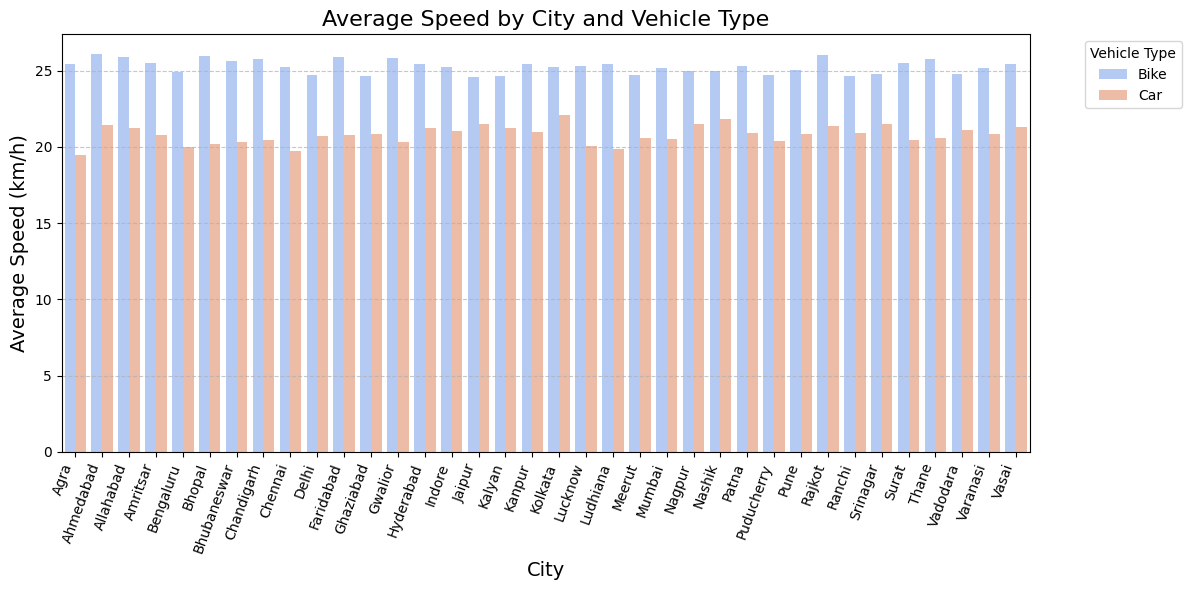

In [413]:
# Plotting average speed by city and vehicle type
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_delivery_filt_grp,
    x='city',
    y='avg_speed',
    hue='VehicleType',
    palette='coolwarm'
)

# Enhancing the plot
plt.title('Average Speed by City and Vehicle Type', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Speed (km/h)', fontsize=14)
plt.xticks(rotation=70, ha='right')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Mostly bike is making delivery at high speed (reason might be that car gets stuck in traffic)